In [14]:
!pip install ipywidgets

# Import Packages

In [15]:
import torch
from torch import nn
from tqdm.auto import tqdm
from torchvision import transforms
from torchvision.datasets import MNIST
from torchvision.utils import make_grid
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


In [16]:
def show_tensor_images(image_tensor, num_images = 25, size = (1,28,28)):
  image_unflat = image_tensor.detach().cpu().view(-1, *size)
  image_grid = make_grid(image_unflat[:num_images], nrow=5)
  plt.imshow(image_grid.permute(1,2,0).squeeze())
  plt.show()

# generator block

In [17]:
def get_generator_block(input_dim, output_dim):
  return nn.Sequential(
      nn.Linear(input_dim, output_dim),
      nn.BatchNorm1d(output_dim),
      nn.ReLU(True)
  )

In [18]:
class Generator(nn.Module):
  def __init__(self, z_dim=10, im_dim=784, hidden_dim=128):
    super(Generator, self).__init__()
    self.gen = nn.Sequential(
        get_generator_block(z_dim, hidden_dim),
        get_generator_block(hidden_dim, hidden_dim * 2),
        get_generator_block(hidden_dim * 2, hidden_dim * 4),
        get_generator_block(hidden_dim * 4, hidden_dim * 8),
        nn.Linear(hidden_dim * 8, im_dim),
        nn.Sigmoid()
    )
  
  def forward(self, noise):
    return self.gen(noise)

# generating noise

In [19]:
def get_noise(n_samples, z_dim, device = 'cpu'):
  return torch.randn(n_samples, z_dim, device = device)

# discriminator block

In [20]:
def get_discriminator_block(input_dim, output_dim):
  return nn.Sequential(
      nn.Linear(input_dim, output_dim),
      nn.LeakyReLU(0.2)
  )

In [21]:
class Discriminator(nn.Module):
  def __init__(self, im_dim = 784, hidden_dim=128):
    super(Discriminator, self).__init__()
    self.disc = nn.Sequential(
        get_discriminator_block(im_dim, hidden_dim * 4),
        get_discriminator_block(hidden_dim*4, hidden_dim*2),
        get_discriminator_block(hidden_dim*2, hidden_dim),
        nn.Linear(hidden_dim, 1)
    )
  
  def forward(self, image):
    return self.disc(image)

# training

In [22]:
criterion = nn.BCEWithLogitsLoss()
n_epochs = 200
z_dim = 64
display_step = 500
batch_size = 128
lr = 1e-5

dataloader = DataLoader(
    MNIST('.', download=True, transform=transforms.ToTensor()),
    batch_size = batch_size,
    shuffle=True
)

In [23]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

gen = Generator(z_dim).to(device)
gen_opt = torch.optim.Adam(gen.parameters(), lr=lr)
disc = Discriminator().to(device)
disc_opt = torch.optim.Adam(disc.parameters(), lr=lr)

In [24]:
def get_disc_loss(gen, disc, criterion, real, num_images, z_dim, device):
  noise_vec = get_noise(num_images, z_dim, device=device)
  gen_noise = gen(noise_vec)
  disc_fake = disc(gen_noise.detach())

  disc_fake_loss = criterion(disc_fake, torch.zeros_like(disc_fake))

  disc_real = disc(real)
  disc_real_loss = criterion(disc_real, torch.ones_like(disc_real))

  disc_loss = (disc_fake_loss + disc_real_loss) / 2

  return disc_loss 
  

In [25]:
def get_gen_loss(gen, disc, criterion, num_images, z_dim, device):
  noise_vec = get_noise(num_images, z_dim, device=device)
  fake_images = gen(noise_vec)
  disc_pred = disc(fake_images)
  gen_loss = criterion(disc_pred, torch.ones_like(disc_pred))

  return gen_loss 

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

Step 500: Generator Loss: 1.3174555011987705, Discriminator Loss: 0.42975851780176116


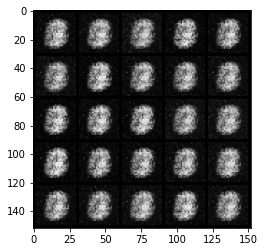

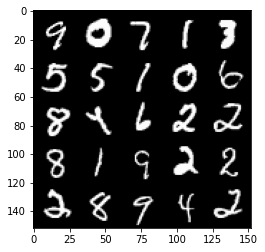

  0%|          | 0/469 [00:00<?, ?it/s]

Step 1000: Generator Loss: 1.6588679373264306, Discriminator Loss: 0.2987964789569381


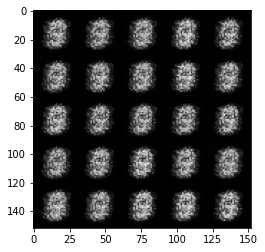

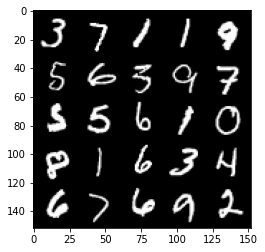

  0%|          | 0/469 [00:00<?, ?it/s]

Step 1500: Generator Loss: 1.8920899569988252, Discriminator Loss: 0.18541172423958785


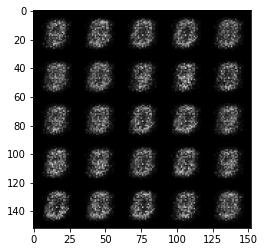

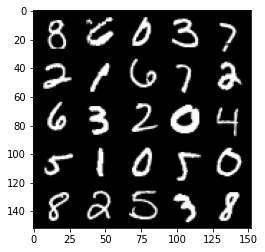

  0%|          | 0/469 [00:00<?, ?it/s]

Step 2000: Generator Loss: 1.6160135543346401, Discriminator Loss: 0.22960405027866357


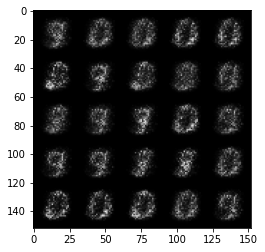

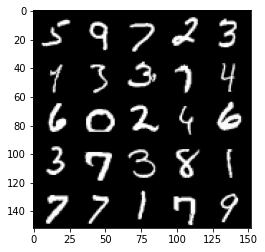

  0%|          | 0/469 [00:00<?, ?it/s]

Step 2500: Generator Loss: 1.5775318071842186, Discriminator Loss: 0.22333618468046182


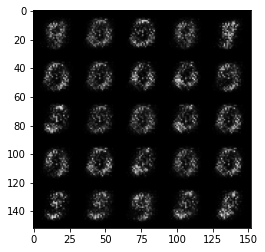

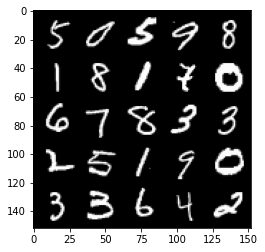

  0%|          | 0/469 [00:00<?, ?it/s]

Step 3000: Generator Loss: 1.8138076105117789, Discriminator Loss: 0.18570520201325424


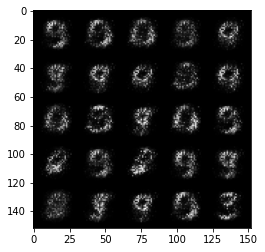

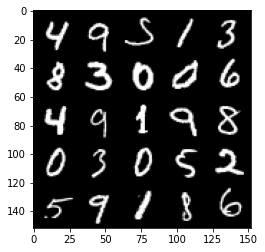

  0%|          | 0/469 [00:00<?, ?it/s]

Step 3500: Generator Loss: 2.2446261065006223, Discriminator Loss: 0.14798035770654672


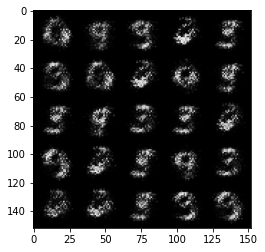

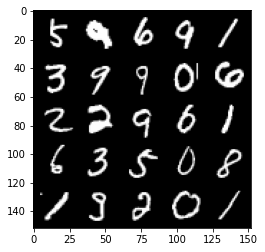

  0%|          | 0/469 [00:00<?, ?it/s]

Step 4000: Generator Loss: 2.6223127512931805, Discriminator Loss: 0.11730307355523104


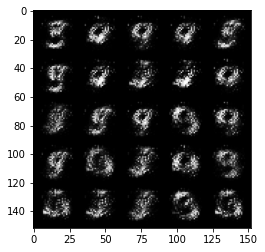

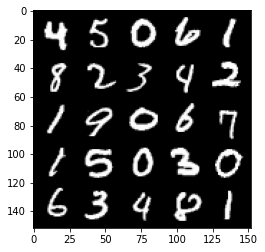

  0%|          | 0/469 [00:00<?, ?it/s]

Step 4500: Generator Loss: 3.0555566077232403, Discriminator Loss: 0.0937920665070414


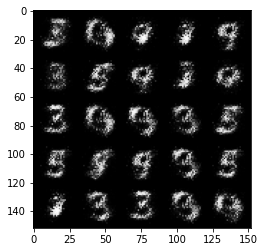

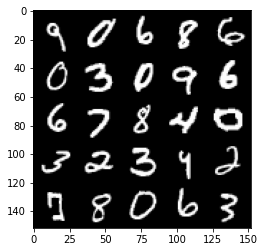

  0%|          | 0/469 [00:00<?, ?it/s]

Step 5000: Generator Loss: 3.2643086767196623, Discriminator Loss: 0.08681585185229783


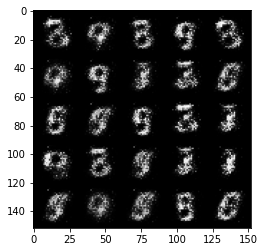

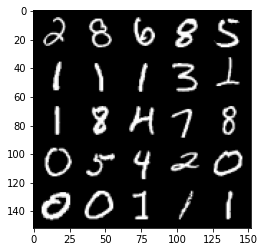

  0%|          | 0/469 [00:00<?, ?it/s]

Step 5500: Generator Loss: 3.439130746364595, Discriminator Loss: 0.07936024752259259


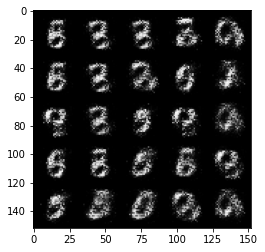

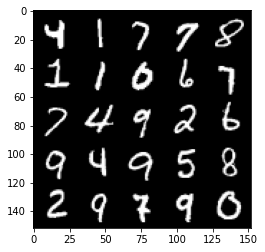

  0%|          | 0/469 [00:00<?, ?it/s]

Step 6000: Generator Loss: 3.480337890148165, Discriminator Loss: 0.0871707242578268


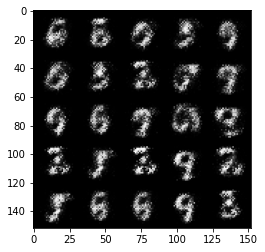

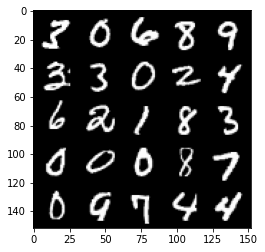

  0%|          | 0/469 [00:00<?, ?it/s]

Step 6500: Generator Loss: 3.5623769755363486, Discriminator Loss: 0.08871090283244853


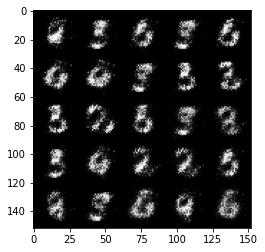

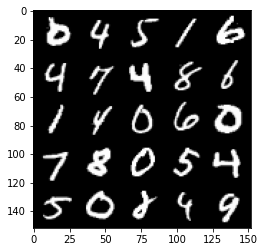

  0%|          | 0/469 [00:00<?, ?it/s]

Step 7000: Generator Loss: 3.6634721455574057, Discriminator Loss: 0.06846997171640394


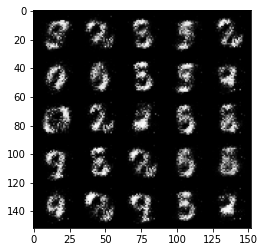

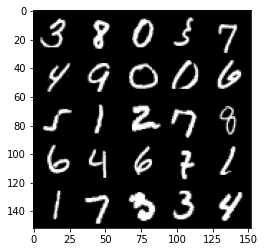

  0%|          | 0/469 [00:00<?, ?it/s]

Step 7500: Generator Loss: 3.632470253944397, Discriminator Loss: 0.07071448584645981


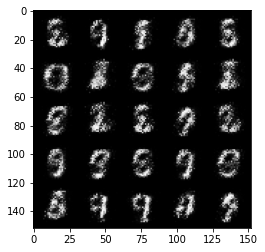

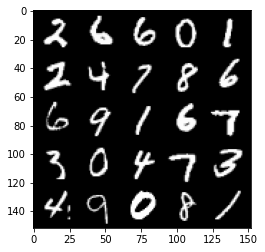

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

Step 8000: Generator Loss: 3.527750050544742, Discriminator Loss: 0.07860372655838722


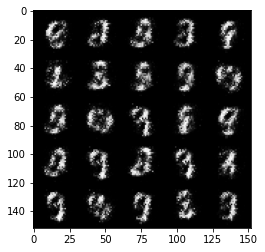

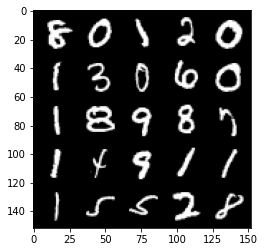

  0%|          | 0/469 [00:00<?, ?it/s]

Step 8500: Generator Loss: 3.749101938247677, Discriminator Loss: 0.06484210214763875


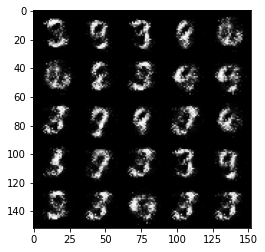

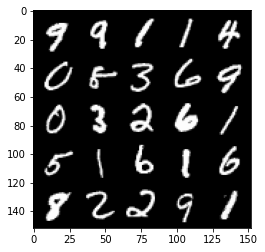

  0%|          | 0/469 [00:00<?, ?it/s]

Step 9000: Generator Loss: 4.018061999320984, Discriminator Loss: 0.05727338414266705


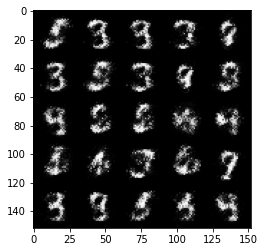

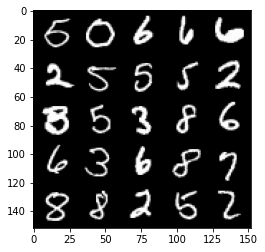

  0%|          | 0/469 [00:00<?, ?it/s]

Step 9500: Generator Loss: 4.014266755580904, Discriminator Loss: 0.06142089702561499


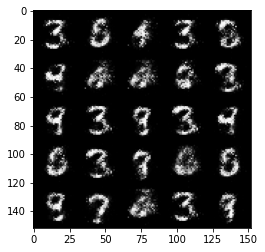

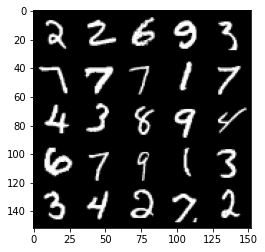

  0%|          | 0/469 [00:00<?, ?it/s]

Step 10000: Generator Loss: 3.8971741032600358, Discriminator Loss: 0.07072470374032855


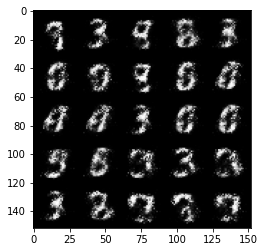

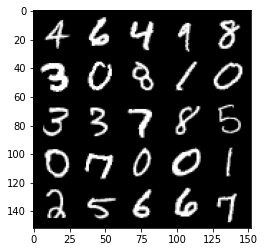

  0%|          | 0/469 [00:00<?, ?it/s]

Step 10500: Generator Loss: 3.9082195596694915, Discriminator Loss: 0.06483343117684126


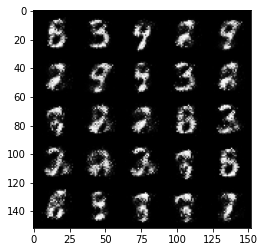

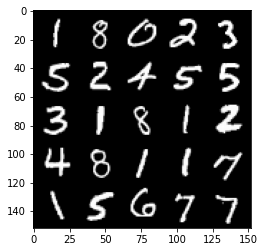

  0%|          | 0/469 [00:00<?, ?it/s]

Step 11000: Generator Loss: 3.9543024983406077, Discriminator Loss: 0.06828197473287587


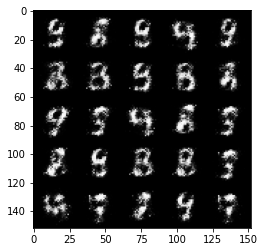

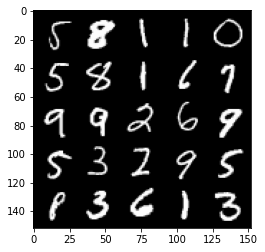

  0%|          | 0/469 [00:00<?, ?it/s]

Step 11500: Generator Loss: 4.012495065689088, Discriminator Loss: 0.062183783743530514


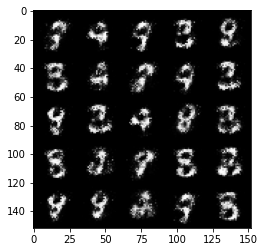

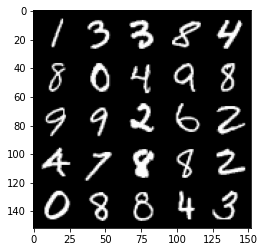

  0%|          | 0/469 [00:00<?, ?it/s]

Step 12000: Generator Loss: 4.161617268562316, Discriminator Loss: 0.07763602840900423


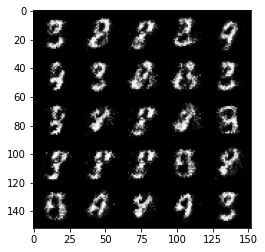

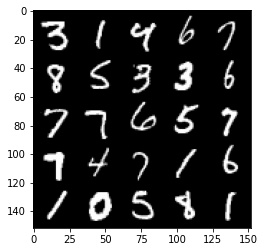

  0%|          | 0/469 [00:00<?, ?it/s]

Step 12500: Generator Loss: 4.109067690372466, Discriminator Loss: 0.07609868450462817


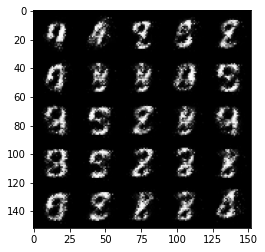

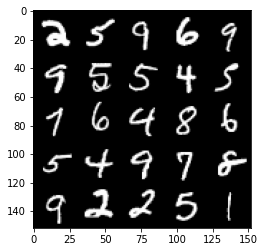

  0%|          | 0/469 [00:00<?, ?it/s]

Step 13000: Generator Loss: 4.136974202156061, Discriminator Loss: 0.07743269954621783


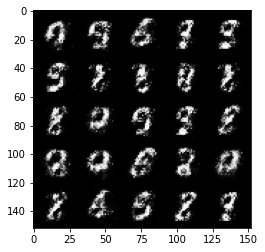

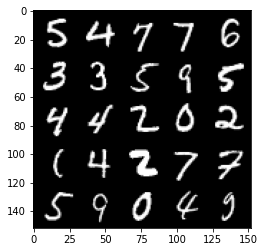

  0%|          | 0/469 [00:00<?, ?it/s]

Step 13500: Generator Loss: 3.990840081214904, Discriminator Loss: 0.07241432841122149


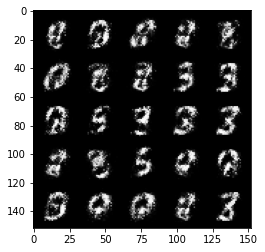

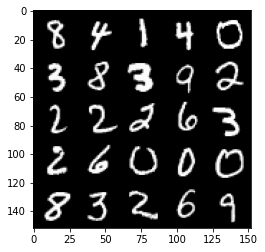

  0%|          | 0/469 [00:00<?, ?it/s]

Step 14000: Generator Loss: 4.122900675296783, Discriminator Loss: 0.08756052324920896


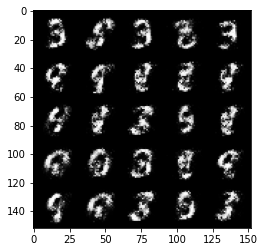

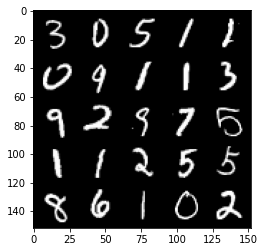

  0%|          | 0/469 [00:00<?, ?it/s]

Step 14500: Generator Loss: 3.9398122792243946, Discriminator Loss: 0.08572908824682231


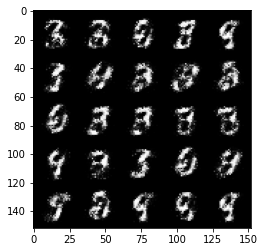

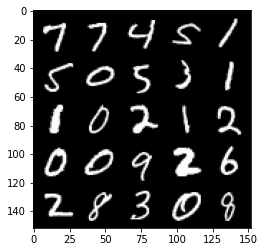

  0%|          | 0/469 [00:00<?, ?it/s]

Step 15000: Generator Loss: 3.9100081415176406, Discriminator Loss: 0.09010348880290979


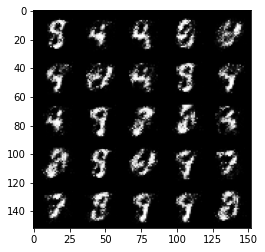

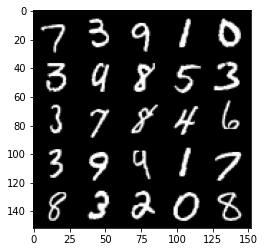

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

Step 15500: Generator Loss: 3.755956928253177, Discriminator Loss: 0.10510169236361988


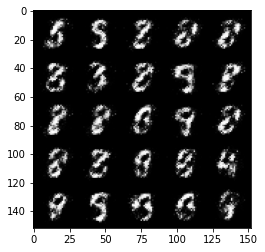

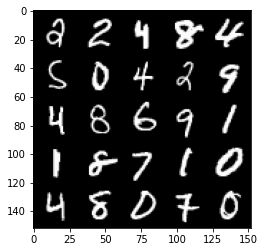

  0%|          | 0/469 [00:00<?, ?it/s]

Step 16000: Generator Loss: 3.6890929985046412, Discriminator Loss: 0.10844848784804337


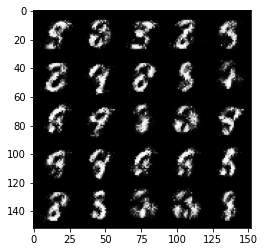

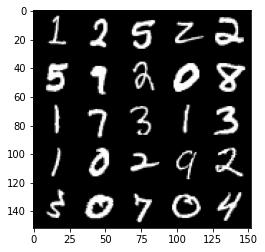

  0%|          | 0/469 [00:00<?, ?it/s]

Step 16500: Generator Loss: 3.5762237915992725, Discriminator Loss: 0.12525471731275323


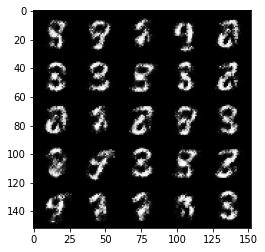

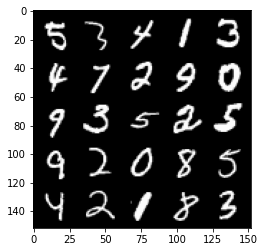

  0%|          | 0/469 [00:00<?, ?it/s]

Step 17000: Generator Loss: 3.8457628340721146, Discriminator Loss: 0.10958646302670239


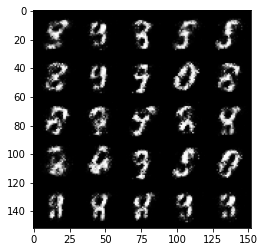

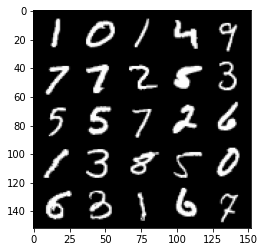

  0%|          | 0/469 [00:00<?, ?it/s]

Step 17500: Generator Loss: 3.7750422501564005, Discriminator Loss: 0.12321327033638953


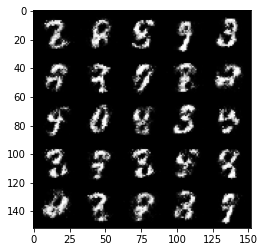

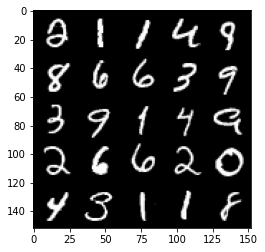

  0%|          | 0/469 [00:00<?, ?it/s]

Step 18000: Generator Loss: 3.5664419207572915, Discriminator Loss: 0.12369865230470913


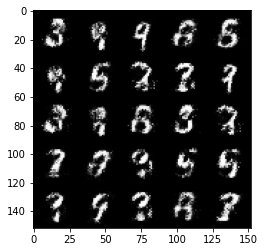

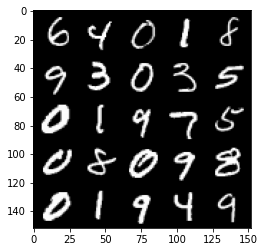

  0%|          | 0/469 [00:00<?, ?it/s]

Step 18500: Generator Loss: 3.538920153617859, Discriminator Loss: 0.12231085854768756


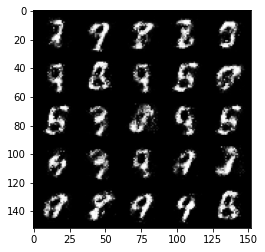

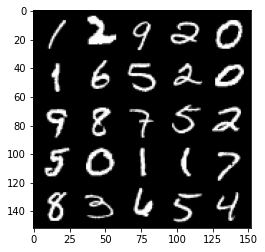

  0%|          | 0/469 [00:00<?, ?it/s]

Step 19000: Generator Loss: 3.4816107249259924, Discriminator Loss: 0.14110930165648464


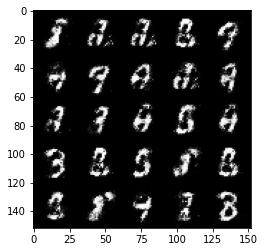

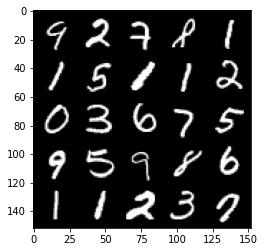

  0%|          | 0/469 [00:00<?, ?it/s]

Step 19500: Generator Loss: 3.363588867187502, Discriminator Loss: 0.1463251249641179


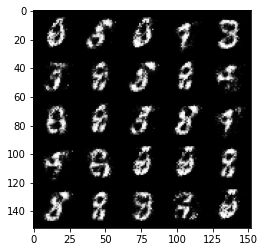

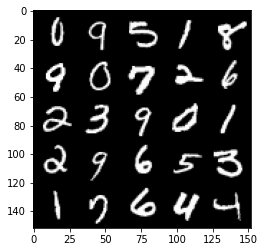

  0%|          | 0/469 [00:00<?, ?it/s]

Step 20000: Generator Loss: 3.188060645103457, Discriminator Loss: 0.15983162629604336


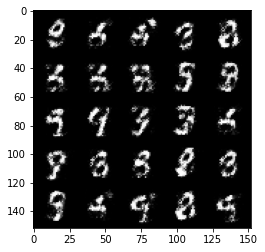

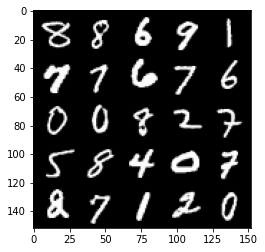

  0%|          | 0/469 [00:00<?, ?it/s]

Step 20500: Generator Loss: 3.299381850719449, Discriminator Loss: 0.14154463806748396


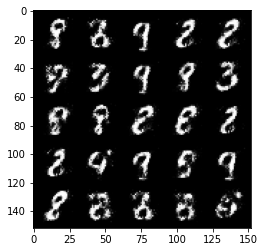

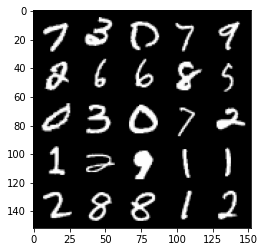

  0%|          | 0/469 [00:00<?, ?it/s]

Step 21000: Generator Loss: 3.3274851026535033, Discriminator Loss: 0.14622171880304818


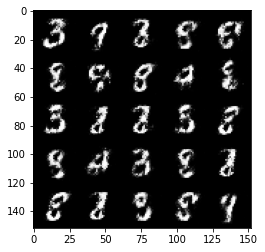

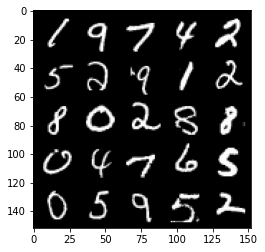

  0%|          | 0/469 [00:00<?, ?it/s]

Step 21500: Generator Loss: 3.2135955357551564, Discriminator Loss: 0.15951990087330337


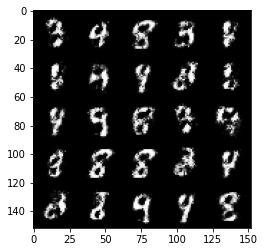

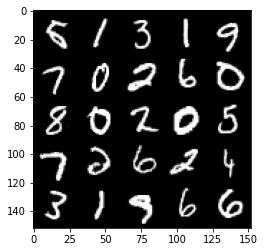

  0%|          | 0/469 [00:00<?, ?it/s]

Step 22000: Generator Loss: 3.0730380382537863, Discriminator Loss: 0.16779469294846067


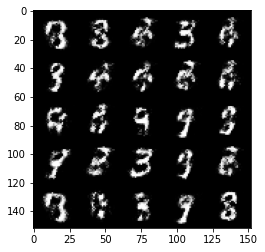

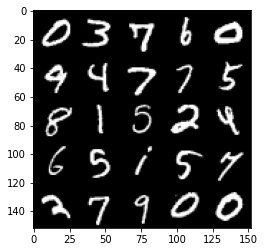

  0%|          | 0/469 [00:00<?, ?it/s]

Step 22500: Generator Loss: 3.122124413490294, Discriminator Loss: 0.1616344958394765


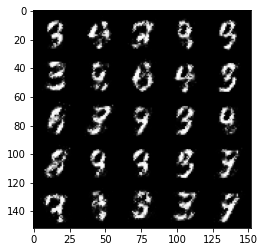

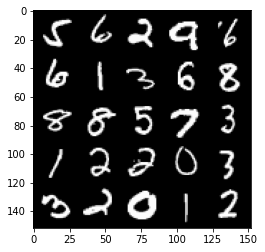

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

Step 23000: Generator Loss: 3.1231559066772427, Discriminator Loss: 0.15676723670959455


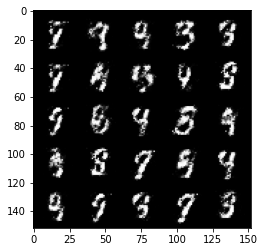

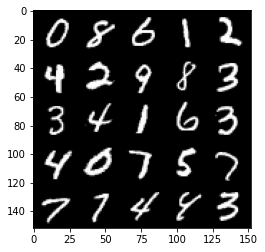

  0%|          | 0/469 [00:00<?, ?it/s]

Step 23500: Generator Loss: 2.9738589644432087, Discriminator Loss: 0.1846931717246773


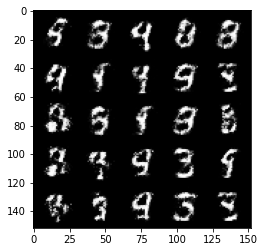

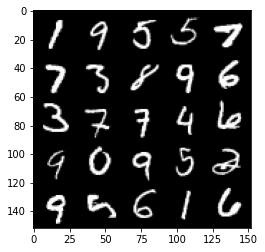

  0%|          | 0/469 [00:00<?, ?it/s]

Step 24000: Generator Loss: 3.022893371105195, Discriminator Loss: 0.1802945034205914


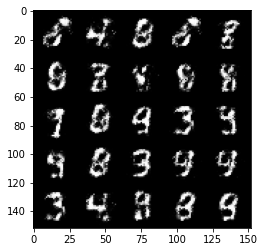

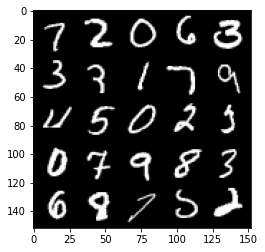

  0%|          | 0/469 [00:00<?, ?it/s]

Step 24500: Generator Loss: 2.87896418952942, Discriminator Loss: 0.1929564666002991


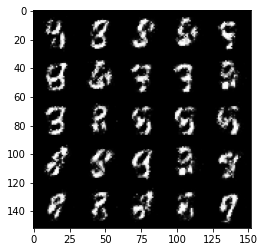

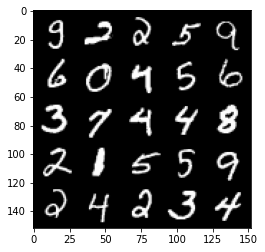

  0%|          | 0/469 [00:00<?, ?it/s]

Step 25000: Generator Loss: 2.821575830936432, Discriminator Loss: 0.199995070770383


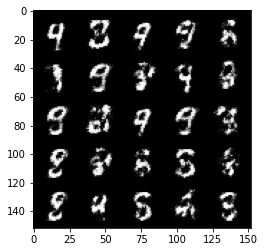

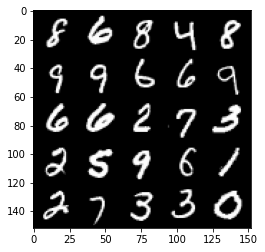

  0%|          | 0/469 [00:00<?, ?it/s]

Step 25500: Generator Loss: 2.889464262962341, Discriminator Loss: 0.18791013927757727


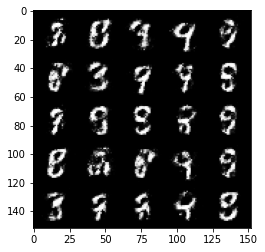

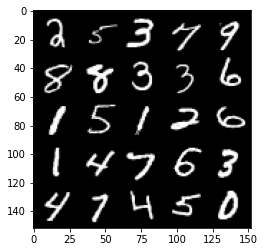

  0%|          | 0/469 [00:00<?, ?it/s]

Step 26000: Generator Loss: 2.9076231570243833, Discriminator Loss: 0.18087937602400758


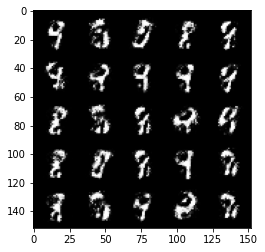

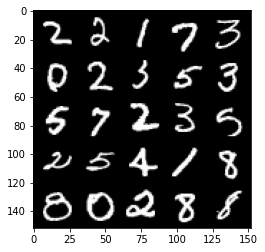

  0%|          | 0/469 [00:00<?, ?it/s]

Step 26500: Generator Loss: 2.909468852996827, Discriminator Loss: 0.1895995293706657


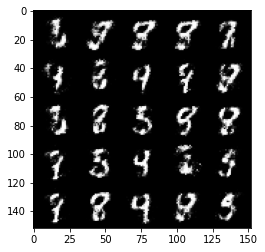

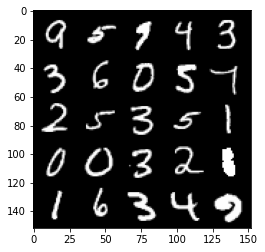

  0%|          | 0/469 [00:00<?, ?it/s]

Step 27000: Generator Loss: 2.7894093847274775, Discriminator Loss: 0.20849234595894825


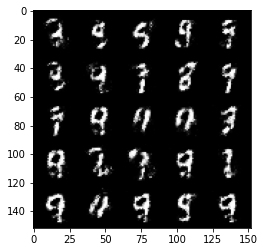

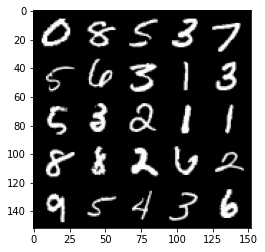

  0%|          | 0/469 [00:00<?, ?it/s]

Step 27500: Generator Loss: 2.797387653827666, Discriminator Loss: 0.2101943864524364


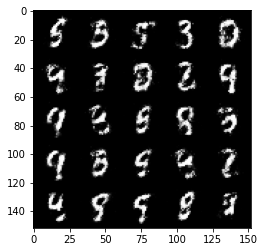

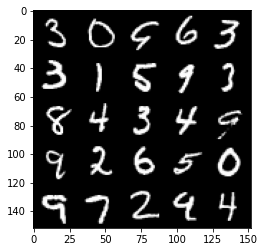

  0%|          | 0/469 [00:00<?, ?it/s]

Step 28000: Generator Loss: 2.7180444626808167, Discriminator Loss: 0.2083299843072891


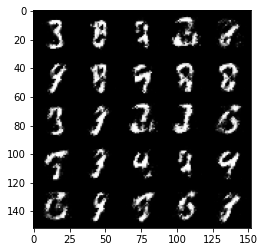

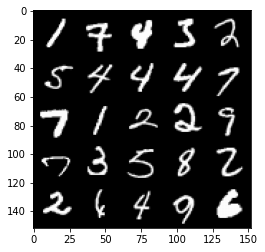

  0%|          | 0/469 [00:00<?, ?it/s]

Step 28500: Generator Loss: 2.733377301692962, Discriminator Loss: 0.22021263644099268


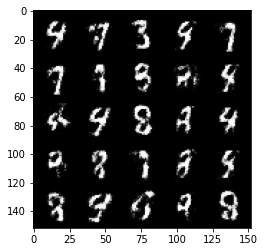

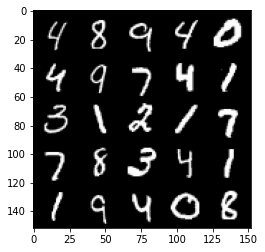

  0%|          | 0/469 [00:00<?, ?it/s]

Step 29000: Generator Loss: 2.672030740261081, Discriminator Loss: 0.22024069452285788


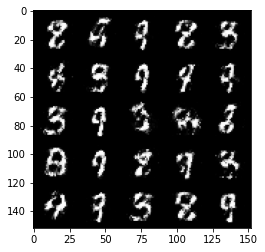

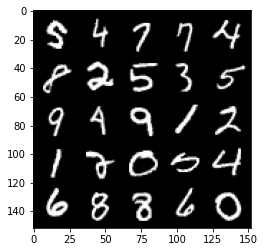

  0%|          | 0/469 [00:00<?, ?it/s]

Step 29500: Generator Loss: 2.587687466144562, Discriminator Loss: 0.23021967276930785


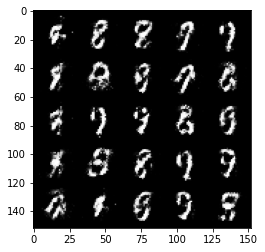

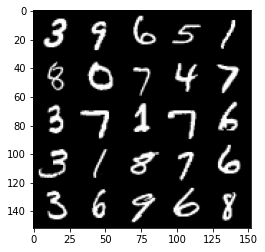

  0%|          | 0/469 [00:00<?, ?it/s]

Step 30000: Generator Loss: 2.567758751392364, Discriminator Loss: 0.2261696140766143


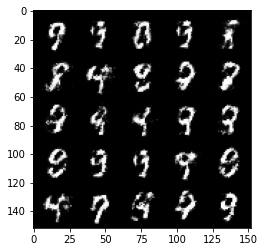

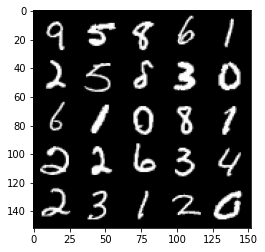

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

Step 30500: Generator Loss: 2.5027048778533922, Discriminator Loss: 0.2355525411665441


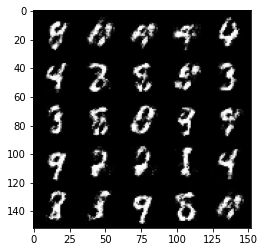

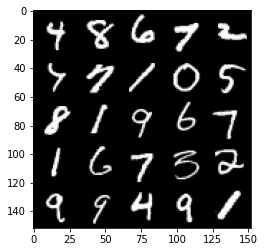

  0%|          | 0/469 [00:00<?, ?it/s]

Step 31000: Generator Loss: 2.395088575839995, Discriminator Loss: 0.254184478878975


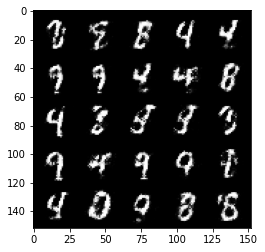

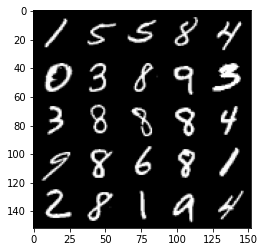

  0%|          | 0/469 [00:00<?, ?it/s]

Step 31500: Generator Loss: 2.453832314968109, Discriminator Loss: 0.23533456975221625


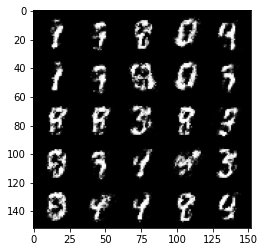

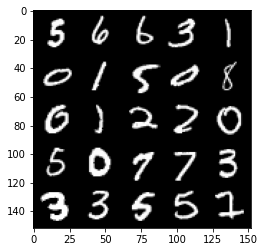

  0%|          | 0/469 [00:00<?, ?it/s]

Step 32000: Generator Loss: 2.6105426273345937, Discriminator Loss: 0.21909035444259622


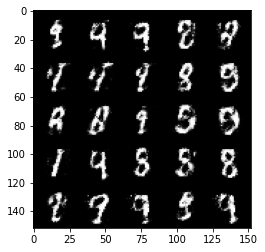

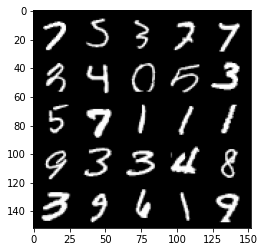

  0%|          | 0/469 [00:00<?, ?it/s]

Step 32500: Generator Loss: 2.4821988244056734, Discriminator Loss: 0.23695427599549307


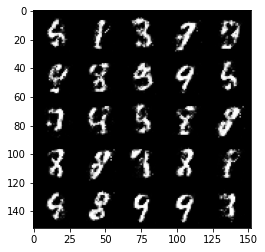

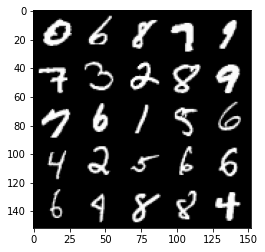

  0%|          | 0/469 [00:00<?, ?it/s]

Step 33000: Generator Loss: 2.3411909039020524, Discriminator Loss: 0.2616272807419301


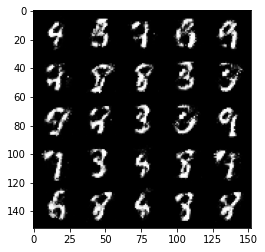

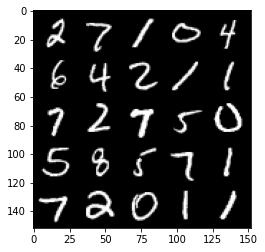

  0%|          | 0/469 [00:00<?, ?it/s]

Step 33500: Generator Loss: 2.43898066186905, Discriminator Loss: 0.2489544740021231


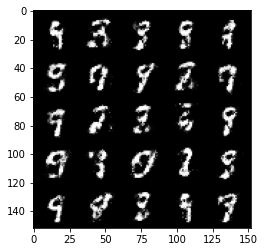

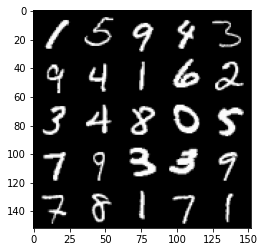

  0%|          | 0/469 [00:00<?, ?it/s]

Step 34000: Generator Loss: 2.48317917203903, Discriminator Loss: 0.23025546631217025


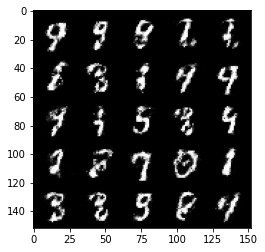

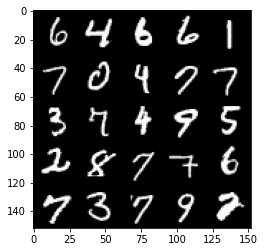

  0%|          | 0/469 [00:00<?, ?it/s]

Step 34500: Generator Loss: 2.412728096008299, Discriminator Loss: 0.25867374861240405


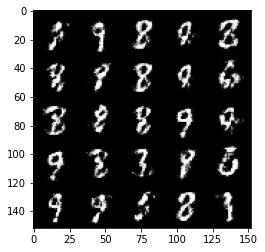

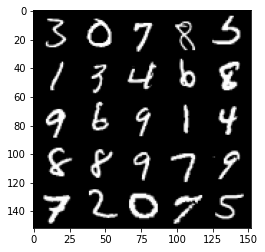

  0%|          | 0/469 [00:00<?, ?it/s]

Step 35000: Generator Loss: 2.3304051303863544, Discriminator Loss: 0.2668568347990513


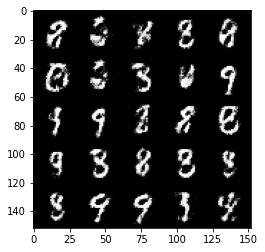

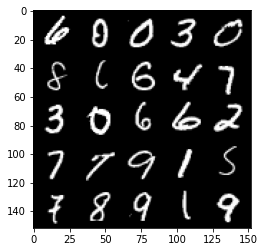

  0%|          | 0/469 [00:00<?, ?it/s]

Step 35500: Generator Loss: 2.3369593880176533, Discriminator Loss: 0.2541856758296488


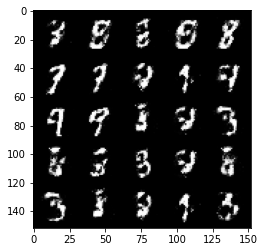

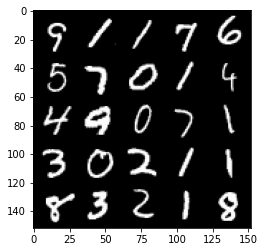

  0%|          | 0/469 [00:00<?, ?it/s]

Step 36000: Generator Loss: 2.4404775047302243, Discriminator Loss: 0.23367146465182323


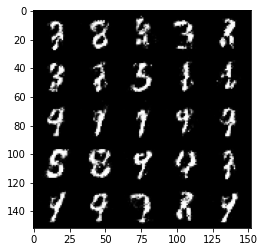

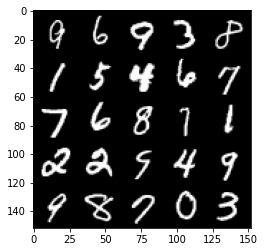

  0%|          | 0/469 [00:00<?, ?it/s]

Step 36500: Generator Loss: 2.408689123392105, Discriminator Loss: 0.245197936028242


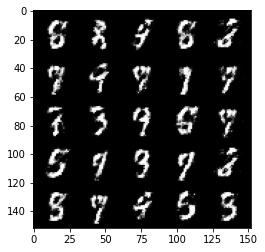

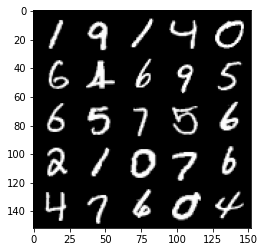

  0%|          | 0/469 [00:00<?, ?it/s]

Step 37000: Generator Loss: 2.361522038459777, Discriminator Loss: 0.261573103427887


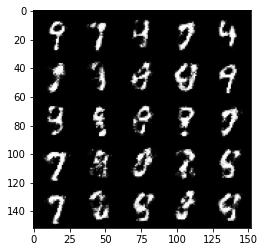

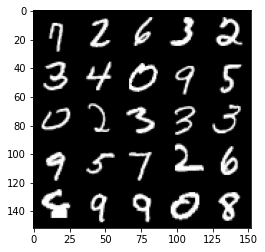

  0%|          | 0/469 [00:00<?, ?it/s]

Step 37500: Generator Loss: 2.2381323094367995, Discriminator Loss: 0.27324933108687405


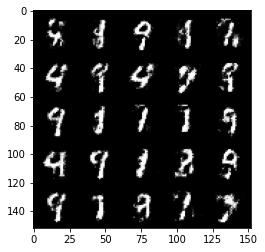

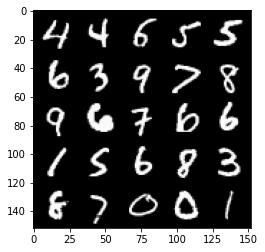

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

Step 38000: Generator Loss: 2.2869740154743203, Discriminator Loss: 0.2657997029423713


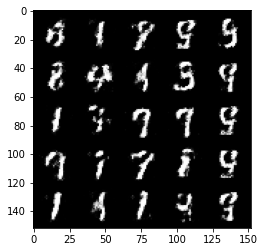

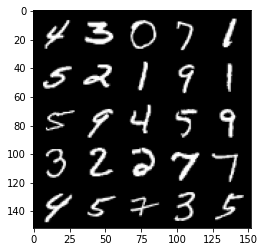

  0%|          | 0/469 [00:00<?, ?it/s]

Step 38500: Generator Loss: 2.4194108409881605, Discriminator Loss: 0.240036802560091


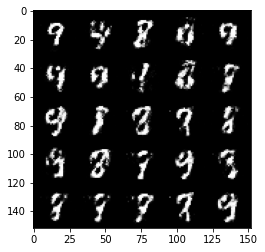

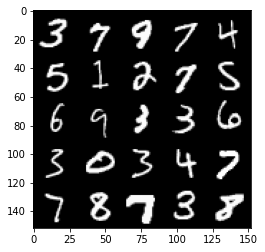

  0%|          | 0/469 [00:00<?, ?it/s]

Step 39000: Generator Loss: 2.341366046190262, Discriminator Loss: 0.25600574848055846


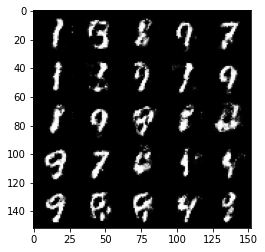

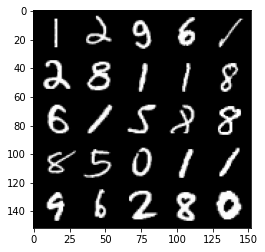

  0%|          | 0/469 [00:00<?, ?it/s]

Step 39500: Generator Loss: 2.212975889444351, Discriminator Loss: 0.28211926662921905


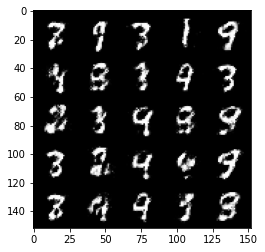

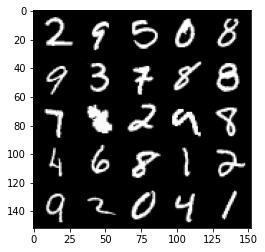

  0%|          | 0/469 [00:00<?, ?it/s]

Step 40000: Generator Loss: 2.1140391705036157, Discriminator Loss: 0.2848363588452337


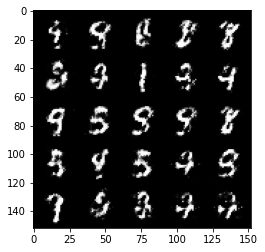

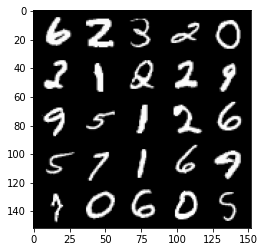

  0%|          | 0/469 [00:00<?, ?it/s]

Step 40500: Generator Loss: 2.2391976914405802, Discriminator Loss: 0.267901551306248


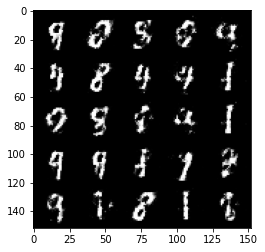

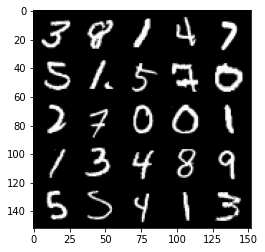

  0%|          | 0/469 [00:00<?, ?it/s]

Step 41000: Generator Loss: 2.122987838029863, Discriminator Loss: 0.29884896486997586


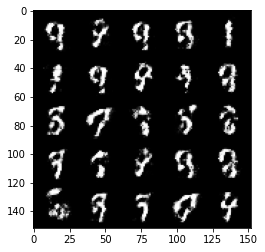

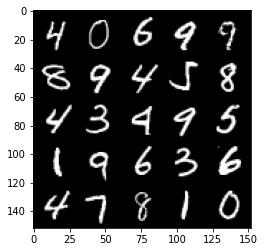

  0%|          | 0/469 [00:00<?, ?it/s]

Step 41500: Generator Loss: 2.102509678125382, Discriminator Loss: 0.29861002373695333


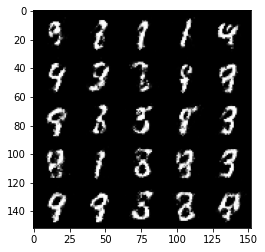

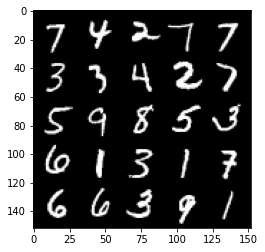

  0%|          | 0/469 [00:00<?, ?it/s]

Step 42000: Generator Loss: 2.1609805772304527, Discriminator Loss: 0.2861195623278619


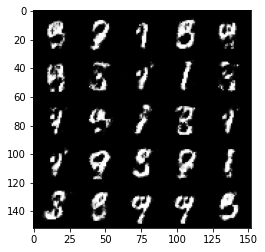

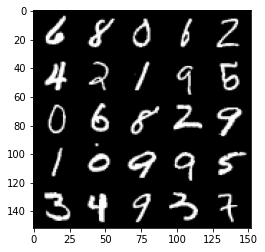

  0%|          | 0/469 [00:00<?, ?it/s]

Step 42500: Generator Loss: 2.0082947657108314, Discriminator Loss: 0.3097213927507399


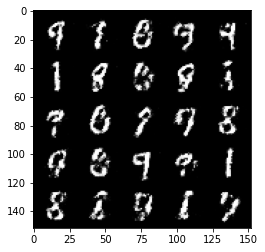

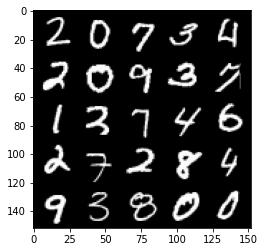

  0%|          | 0/469 [00:00<?, ?it/s]

Step 43000: Generator Loss: 1.9611456589698781, Discriminator Loss: 0.32330454665422415


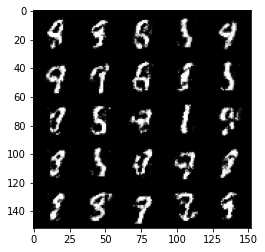

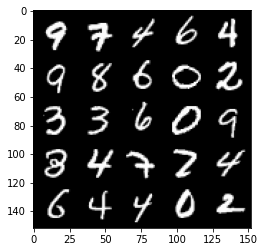

  0%|          | 0/469 [00:00<?, ?it/s]

Step 43500: Generator Loss: 1.9591551704406733, Discriminator Loss: 0.32507480981946024


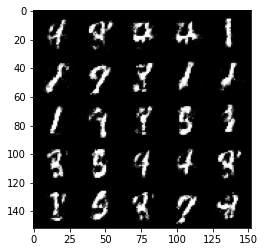

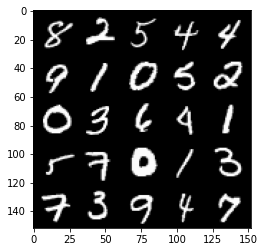

  0%|          | 0/469 [00:00<?, ?it/s]

Step 44000: Generator Loss: 1.8700184185504916, Discriminator Loss: 0.3457653968334198


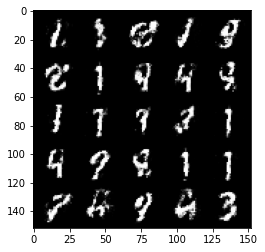

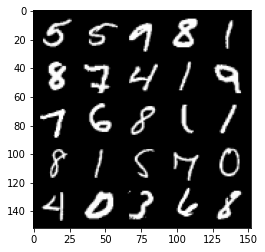

  0%|          | 0/469 [00:00<?, ?it/s]

Step 44500: Generator Loss: 1.9809527890682226, Discriminator Loss: 0.3126765790283684


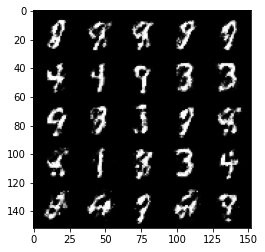

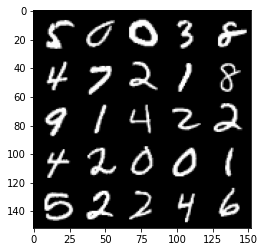

  0%|          | 0/469 [00:00<?, ?it/s]

Step 45000: Generator Loss: 1.968589399814604, Discriminator Loss: 0.3234445719122886


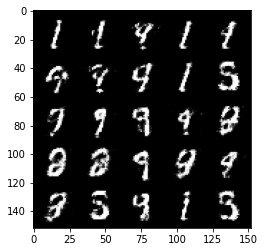

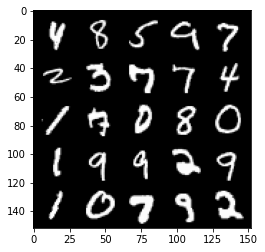

  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/469 [00:00<?, ?it/s]

Step 45500: Generator Loss: 1.8895253908634178, Discriminator Loss: 0.338238549858332


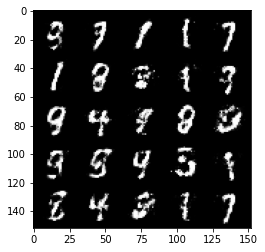

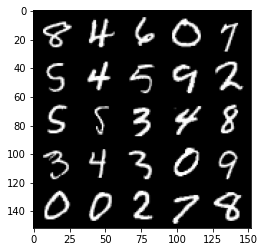

  0%|          | 0/469 [00:00<?, ?it/s]

Step 46000: Generator Loss: 1.9376341998577087, Discriminator Loss: 0.33190699130296747


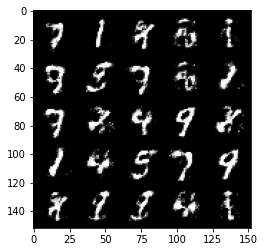

In [ ]:
cur_step = 0
mean_generator_loss = 0
mean_discriminator_loss = 0

for epoch in range(n_epochs):
  for real, _ in tqdm(dataloader):
    cur_batch_size = len(real)

    real = real.view(cur_batch_size, -1).to(device)

    disc_opt.zero_grad()

    disc_loss = get_disc_loss(gen, disc, criterion, real, cur_batch_size, z_dim, device)

    disc_loss.backward(retain_graph=True)

    disc_opt.step()

    gen_opt.zero_grad()
    gen_loss = get_gen_loss(gen, disc, criterion, cur_batch_size, z_dim, device)
    gen_loss.backward(retain_graph=True)
    gen_opt.step()

    mean_discriminator_loss += disc_loss.item() / display_step
    mean_generator_loss += gen_loss.item() / display_step

    if cur_step % display_step == 0 and cur_step > 0:
      print(f"Step {cur_step}: Generator Loss: {mean_generator_loss}, Discriminator Loss: {mean_discriminator_loss}")
      fake_noise = get_noise(cur_batch_size, z_dim, device=device)
      fake = gen(fake_noise)
      show_tensor_images(fake)
      show_tensor_images(real)
      mean_generator_loss = 0
      mean_discriminator_loss = 0
    cur_step += 1